In [3]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

# Diet (Figure 2e)

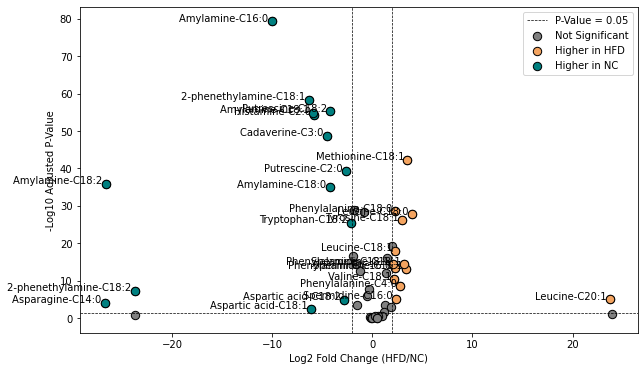

In [4]:
# load the feature table formatted to only contain the features annotated as N-acyl lipids
data = pd.read_csv('/.../acyl_lipids_table_diet.tsv', sep='\t')

# load the compound names table
compound_names_df = pd.read_csv('/.../compounds_features_diet.tsv', sep='\t')

# Filter columns that start with 'MS_'
ms_columns = [col for col in data.columns if col.startswith('MS_')]

# Separate the data into two groups based on the diet attribute
hfd_data = data[data['ATTRIBUTE_diet'] == 'HFD'][ms_columns]
nc_data = data[data['ATTRIBUTE_diet'] == 'NC'][ms_columns]

# Define a small constant to avoid division by zero
epsilon = 1e-6

# Function to perform Mann-Whitney U test and calculate log2 fold change
def analyze_metabolites(hfd_group, nc_group):
    results = []
    for metabolite in ms_columns:
        # Perform Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(hfd_group[metabolite], nc_group[metabolite], alternative='two-sided')
        
        # Calculate median fold change (HFD/NC) and convert to log2 scale
        hfd_median = np.mean(hfd_group[metabolite])
        nc_median = np.mean(nc_group[metabolite])
        
        # Add epsilon to avoid division by zero
        fold_change = (hfd_median + epsilon) / (nc_median + epsilon)
        log2_fold_change = np.log2(fold_change)
        
        results.append((metabolite, -np.log10(p_value), log2_fold_change, p_value, hfd_median, nc_median))
    
    return results

# Perform analysis
metabolite_results = analyze_metabolites(hfd_data, nc_data)

# Create a DataFrame from the results
results_df = pd.DataFrame(metabolite_results, columns=['Metabolite', 'MinusLog10_PValue', 'Log2FoldChange', 'PValue', 'hfd_median', 'nc_median'])

# Extract p-values
p_values = results_df['PValue'].values

# Apply Benjamini-Hochberg correction
corrected_p_values = multipletests(p_values, alpha=0.05, method='fdr_bh')[1]

# Add corrected p-values to the dataframe
results_df['AdjustedPValue'] = corrected_p_values
results_df['MinusLog10_AdjustedPValue'] = -np.log10(corrected_p_values)

# Merge results with compound names
merged_df = pd.merge(results_df, compound_names_df[['MS_#Scan#', 'Compound_Name_simplified']], 
                     left_on='Metabolite', right_on='MS_#Scan#')
# Create volcano plot
plt.figure(figsize=(10, 6))

# Define significance criteria
significant = (merged_df['AdjustedPValue'] < 0.05) & (abs(merged_df['Log2FoldChange']) > 2)

# Plot non-significant points
plt.scatter(merged_df['Log2FoldChange'], merged_df['MinusLog10_AdjustedPValue'], color='grey', 
            edgecolor='black', s=70, label='Not Significant')

# Plot significant points higher in HFD (red)
plt.scatter(merged_df[significant & (merged_df['Log2FoldChange'] > 0)]['Log2FoldChange'],
            merged_df[significant & (merged_df['Log2FoldChange'] > 0)]['MinusLog10_AdjustedPValue'],
            color='sandybrown', s=70, edgecolors='black', label='Higher in HFD')

# Plot significant points higher in NC (blue)
plt.scatter(merged_df[significant & (merged_df['Log2FoldChange'] < 0)]['Log2FoldChange'],
            merged_df[significant & (merged_df['Log2FoldChange'] < 0)]['MinusLog10_AdjustedPValue'],
            color='teal', s=70, edgecolors='black', label='Higher in NC')

# Annotate points with compound names
for i, row in merged_df.iterrows():
    if significant[i]:
        plt.text(row['Log2FoldChange'], row['MinusLog10_AdjustedPValue'], row['Compound_Name_simplified'],
                 fontsize=10, ha='right')

# Adding labels and title
plt.xlabel('Log2 Fold Change (HFD/NC)')
plt.ylabel('-Log10 Adjusted P-Value')
plt.axhline(-np.log10(0.05), color='black', linestyle='dashed', linewidth=0.7, label='P-Value = 0.05')
plt.axvline(2, color='black', linestyle='dashed', linewidth=0.7)
plt.axvline(-2, color='black', linestyle='dashed', linewidth=0.7)
plt.legend()
plt.grid(False)

plt.savefig("/.../Figure_3e.pdf")

# Show the plot
plt.show()


# Antibiotic (Figure 2f)

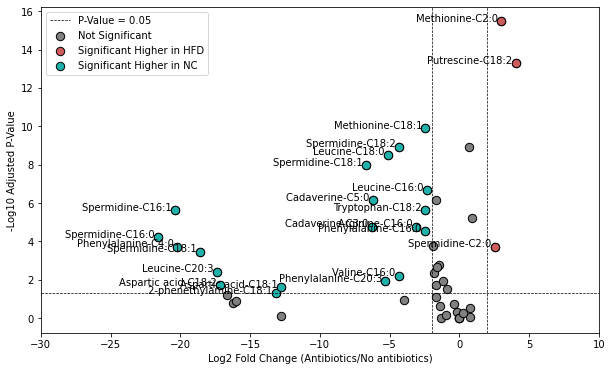

In [5]:
# Load the data
data = pd.read_csv('/Users/helenarusso/Documents/Pesquisa/UCSD Post-doc/Acyl lipids/Manuscript/Figure_examples/Karin/acyl_lipids_table_antibiotic.tsv', sep='\t')

# Load the compound names data
compound_names_df = pd.read_csv('/Users/helenarusso/Documents/Pesquisa/UCSD Post-doc/Acyl lipids/Manuscript/Figure_examples/Karin/compounds_features_antibiotic.tsv', sep='\t')

# Filter columns that start with 'MS_'
ms_columns = [col for col in data.columns if col.startswith('MS_')]

# Separate the data into two groups based on the diet attribute
hfd_data = data[data['ATTRIBUTE_antibiotics_YN'] == 'Yes'][ms_columns]
nc_data = data[data['ATTRIBUTE_antibiotics_YN'] == 'No'][ms_columns]

# Define a small constant to avoid division by zero
epsilon = 1e-4

# Function to perform Mann-Whitney U test and calculate log2 fold change
def analyze_metabolites(hfd_group, nc_group):
    results = []
    for metabolite in ms_columns:
        # Perform Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(hfd_group[metabolite], nc_group[metabolite], alternative='two-sided')
        
        # Calculate median fold change (HFD/NC) and convert to log2 scale
        hfd_median = np.mean(hfd_group[metabolite])
        nc_median = np.mean(nc_group[metabolite])
        
        # Add epsilon to avoid division by zero
        fold_change = (hfd_median + epsilon) / (nc_median + epsilon)
        log2_fold_change = np.log2(fold_change)
        
        results.append((metabolite, -np.log10(p_value), log2_fold_change, p_value, hfd_median, nc_median))
    
    return results

# Perform analysis
metabolite_results = analyze_metabolites(hfd_data, nc_data)

# Create a DataFrame from the results
results_df = pd.DataFrame(metabolite_results, columns=['Metabolite', 'MinusLog10_PValue', 'Log2FoldChange', 'PValue', 'hfd_median', 'nc_median'])

# Extract p-values
p_values = results_df['PValue'].values

# Apply Benjamini-Hochberg correction
corrected_p_values = multipletests(p_values, alpha=0.05, method='fdr_bh')[1]

# Add corrected p-values to the dataframe
results_df['AdjustedPValue'] = corrected_p_values
results_df['MinusLog10_AdjustedPValue'] = -np.log10(corrected_p_values)

# Merge results with compound names
merged_df = pd.merge(results_df, compound_names_df[['MS_#Scan#', 'Compound_Name_simplified']], 
                     left_on='Metabolite', right_on='MS_#Scan#')

# Create volcano plot
plt.figure(figsize=(10, 6))

# Define significance criteria
significant = (merged_df['AdjustedPValue'] < 0.05) & (abs(merged_df['Log2FoldChange']) > 2)

# Plot non-significant points
plt.scatter(merged_df['Log2FoldChange'], merged_df['MinusLog10_AdjustedPValue'], color='grey', edgecolor='black', 
            s=70, label='Not Significant')

# Plot significant points higher in HFD (red)
plt.scatter(merged_df[significant & (merged_df['Log2FoldChange'] > 0)]['Log2FoldChange'],
            merged_df[significant & (merged_df['Log2FoldChange'] > 0)]['MinusLog10_AdjustedPValue'],
            color='indianred', edgecolor='black', s=70, label='Significant Higher in HFD')

# Plot significant points higher in NC (blue)
plt.scatter(merged_df[significant & (merged_df['Log2FoldChange'] < 0)]['Log2FoldChange'],
            merged_df[significant & (merged_df['Log2FoldChange'] < 0)]['MinusLog10_AdjustedPValue'],
            color='lightseagreen', edgecolor='black', s=70, label='Significant Higher in NC')

# Annotate points with compound names
for i, row in merged_df.iterrows():
    if significant[i]:
        plt.text(row['Log2FoldChange'], row['MinusLog10_AdjustedPValue'], row['Compound_Name_simplified'],
                 fontsize=10, ha='right')

# Adding labels and title
plt.xlabel('Log2 Fold Change (Antibiotics/No antibiotics)')
plt.ylabel('-Log10 Adjusted P-Value')
plt.axhline(-np.log10(0.05), color='black', linestyle='dashed', linewidth=0.7, label='P-Value = 0.05')
plt.axvline(2, color='black', linestyle='dashed', linewidth=0.7)
plt.axvline(-2, color='black', linestyle='dashed', linewidth=0.7)
plt.legend()
plt.xlim(-30, 10)
plt.grid(False)

plt.savefig("/.../Figure_3f.pdf")

# Show the plot
plt.show()
